In [19]:
import os
import re
import csv


# preapre CSV

In [20]:
results_path = "results"
output_csv = "results.csv"

In [21]:
# Regex to capture the RESULT line
pattern = re.compile(
    r"\[RESULT\]\s*backend=(\w+)\s+taxa=(\d+)\s+sites=(\d+)\s+patterns=(\d+)\s+time=([\d\.e\+\-]+)s\s+likelihood=([\-.\deE]+)"
)


In [22]:
data = []

In [23]:
#read files in results_path


def read_files_in_directory(directory):
    files = os.listdir(directory)
    for file in files:
        if file.endswith('.txt'):
            print(f"Reading file: {file}")
            with open(f'{results_path}/{file}', 'r') as f:
                for line in f:
                    match = pattern.search(line)
                    if match:
                        
                        backend, taxa, sites, patterns, time, likelihood = match.groups()
                        if taxa != "100":
                            continue
                        data.append([backend, taxa, sites, patterns, likelihood, time])

                        # Write to CSV
                        # with open(output_csv, 'w', newline='') as csvfile:
                        #     writer = csv.writer(csvfile)
                        #     writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time"])
                        #     writer.writerows(data)

    print(f"Extracted {len(data)} results to {output_csv}")



In [24]:
read_files_in_directory(results_path)

Reading file: output_100taxa_1000000_cuda.txt
Reading file: output_4taxa_1000_eigen.txt
Reading file: output_4taxa_1000000_openmp_gpu.txt
Reading file: output_100taxa_10000_eigen.txt
Reading file: output_100taxa_100_openacc.txt
Reading file: output_4taxa_10000_eigen.txt
Reading file: output_100taxa_100_eigen.txt
Reading file: output_4taxa_100_openmp_gpu.txt
Reading file: output_4taxa_100_eigen.txt
Reading file: output_100taxa_100000_openacc.txt
Reading file: output_4taxa_100_openacc.txt
Reading file: output_100taxa_10000_cublas.txt
Reading file: output_4taxa_100000_eigen.txt
Reading file: output_4taxa_1000_openacc.txt
Reading file: output_100taxa_10000_openacc.txt
Reading file: output_4taxa_10000_openmp_gpu.txt
Reading file: output_100taxa_1000000_openmp_gpu.txt
Reading file: output_100taxa_100000_cpu.txt
Reading file: output_100taxa_1000000_eigen.txt
Reading file: output_100taxa_100_cublas.txt
Reading file: output_4taxa_1000_cpu.txt
Reading file: output_4taxa_1000000_openacc.txt
Readi

In [25]:
print(data)

[['CUDA_KERNEL', '100', '1000000', '1000000', '-75780321.281958416104317', '12.756721398000000'], ['EIGEN', '100', '10000', '10000', '-757851.689941375167109', '0.798616533000000'], ['OPENACC', '100', '100', '100', '-7633.592924372792368', '0.130066201000000'], ['EIGEN', '100', '100', '100', '-7633.592924372791458', '0.020403908000000'], ['OPENACC', '100', '100000', '100000', '-7577217.412119470536709', '1.174116826000000'], ['CUBLAS', '100', '10000', '10000', '-757851.689941375167109', '0.275164841000000'], ['OPENACC', '100', '10000', '10000', '-757851.689941375167109', '0.254945578000000'], ['OPENMP_GPU', '100', '1000000', '1000000', '-75780321.281958416104317', '12.811887548000000'], ['CPU', '100', '100000', '100000', '-7577217.412119471468031', '3.765609667000000'], ['EIGEN', '100', '1000000', '1000000', '-75780321.281958416104317', '87.968698102999994'], ['CUBLAS', '100', '100', '100', '-7633.592924372791458', '0.160913608000000'], ['CUDA_KERNEL', '100', '10000', '10000', '-757851

In [26]:
alignment_pattern = re.compile(r"Alignment has (\d+) sequences with (\d+) columns, (\d+) distinct patterns")
likelihood_pattern = re.compile(r"Initial log-likelihood:\s+([-0-9.]+).*?took ([0-9.]+) wall-clock sec")

# Data list
# data = []


In [27]:
# add iqtree results
iqtree_results_path = "results/iqtree_results"

def read_iqtree_results(directory):
    files = os.listdir(directory)
    for file in files:
        if file.endswith('.log'):
            print(f"Reading IQ-TREE file: {file}")
            with open(f'{iqtree_results_path}/{file}', 'r') as f:
                content = f.read()
        
                # Extract alignment info
                aln_match = alignment_pattern.search(content)
                ll_match = likelihood_pattern.search(content)
                
                if aln_match and ll_match:
                    taxa = int(aln_match.group(1))
                    sites = int(aln_match.group(2))
                    patterns = int(aln_match.group(3))
                    likelihood = float(ll_match.group(1))
                    time = float(ll_match.group(2))
                    
                    data.append(["IQ-TREE_SIMD", taxa, sites, patterns, likelihood, time])



    print(f"Extracted {len(data)} IQ-TREE results to {output_csv}")

In [28]:
read_iqtree_results(iqtree_results_path)

Reading IQ-TREE file: output_100taxa_100000_iqtree.log
Reading IQ-TREE file: output_100taxa_1000_iqtree.log
Reading IQ-TREE file: output_100taxa_1000000_iqtree.log
Reading IQ-TREE file: output_100taxa_10000_iqtree.log
Reading IQ-TREE file: output_100taxa_100_iqtree.log
Extracted 35 IQ-TREE results to results.csv


In [29]:
print(data)

[['CUDA_KERNEL', '100', '1000000', '1000000', '-75780321.281958416104317', '12.756721398000000'], ['EIGEN', '100', '10000', '10000', '-757851.689941375167109', '0.798616533000000'], ['OPENACC', '100', '100', '100', '-7633.592924372792368', '0.130066201000000'], ['EIGEN', '100', '100', '100', '-7633.592924372791458', '0.020403908000000'], ['OPENACC', '100', '100000', '100000', '-7577217.412119470536709', '1.174116826000000'], ['CUBLAS', '100', '10000', '10000', '-757851.689941375167109', '0.275164841000000'], ['OPENACC', '100', '10000', '10000', '-757851.689941375167109', '0.254945578000000'], ['OPENMP_GPU', '100', '1000000', '1000000', '-75780321.281958416104317', '12.811887548000000'], ['CPU', '100', '100000', '100000', '-7577217.412119471468031', '3.765609667000000'], ['EIGEN', '100', '1000000', '1000000', '-75780321.281958416104317', '87.968698102999994'], ['CUBLAS', '100', '100', '100', '-7633.592924372791458', '0.160913608000000'], ['CUDA_KERNEL', '100', '10000', '10000', '-757851

In [30]:
# Write to CSV
with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["backend", "taxa", "sites", "patterns", "likelihood", "time"])
    writer.writerows(data)

# Analysis of Results

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
# Read the CSV file into a DataFrame
df = pd.read_csv(output_csv)
# Display the first few rows of the DataFrame
df.head()

,backend,taxa,sites,patterns,likelihood,time
0,CUDA_KERNEL,100,1000000,1000000,-7.578032e+07,12.756721
1,EIGEN,100,10000,10000,-7.578517e+05,0.798617
2,OPENACC,100,100,100,-7.633593e+03,0.130066
3,EIGEN,100,100,100,-7.633593e+03,0.020404
4,OPENACC,100,100000,100000,-7.577217e+06,1.174117


In [33]:
groups = df.groupby('taxa')

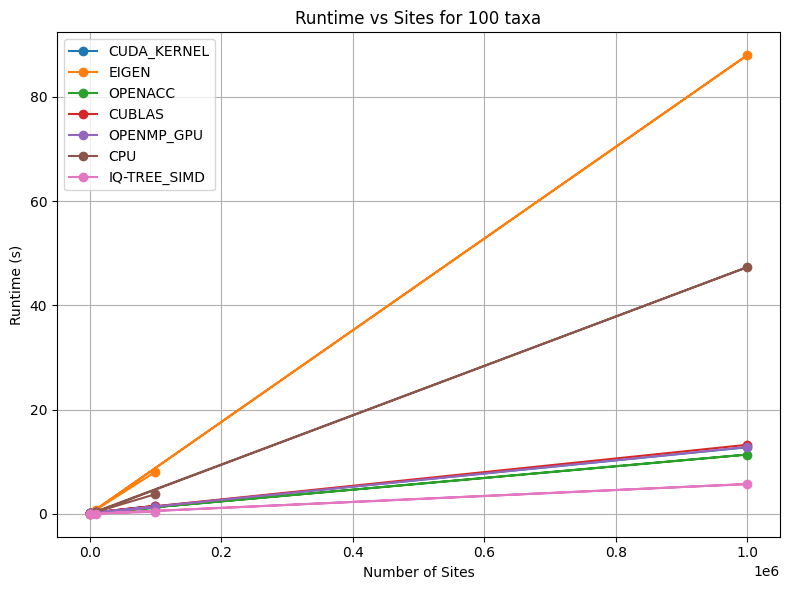

In [34]:
# Plot
plt.figure(figsize=(8,6))
for taxa, group in groups:
    if taxa != 100:
        continue
        
    for backend in group['backend'].unique():
        backend_data = group[group['backend'] == backend]
        plt.plot(
            backend_data['sites'],
            backend_data['time'],
            marker='o',
            label=f"{backend}"
        )

plt.xlabel('Number of Sites')
plt.ylabel('Runtime (s)')
plt.title('Runtime vs Sites for 100 taxa')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


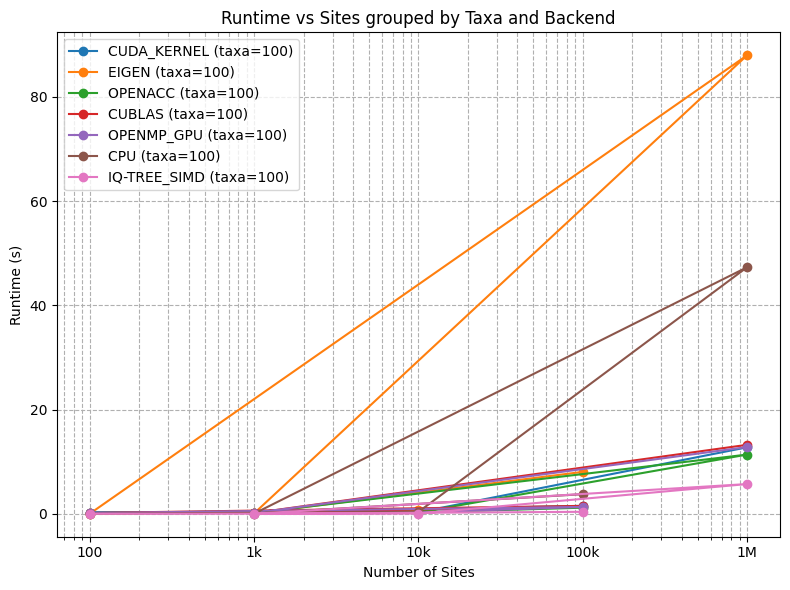

In [35]:
# Plot
plt.figure(figsize=(8,6))
for taxa, group in groups:
    if taxa != 100:
        continue
    for backend in group['backend'].unique():
        backend_data = group[group['backend'] == backend]
        plt.plot(
            backend_data['sites'],
            backend_data['time'],
            marker='o',
            label=f"{backend} (taxa={taxa})"
        )

plt.xlabel('Number of Sites')
plt.ylabel('Runtime (s)')
plt.title('Runtime vs Sites grouped by Taxa and Backend')
plt.legend()
plt.grid(True, which="both", ls="--")

# Use log scale for x-axis
plt.xscale('log')

# Set custom ticks for log scale
plt.xticks([100, 1000, 10000, 100000, 1000000], 
           ['100', '1k', '10k', '100k', '1M'])

plt.tight_layout()
plt.show()

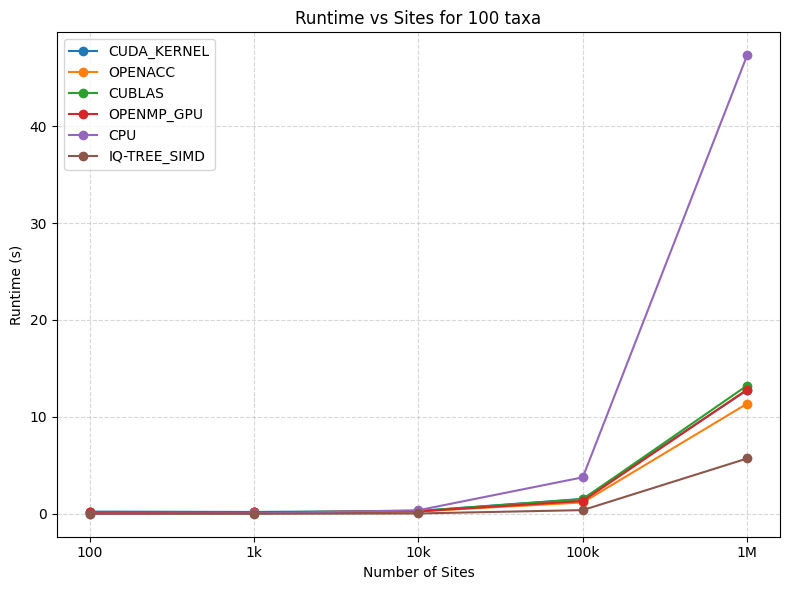

In [36]:
groups = df.groupby('taxa')

plt.figure(figsize=(8,6))
for taxa, group in groups:
    if taxa != 100:
        continue  # Skip taxa other than 100
    for backend in group['backend'].unique():
        backend_data = group[group['backend'] == backend].sort_values('sites')  # ✅ Sort by sites
        if backend in [ 'IQ-TREE_SIMD_withoutbrent', 'EIGEN']:
            continue
        plt.plot(
            backend_data['sites'],
            backend_data['time'],
            marker='o',
            label=f"{backend}"
        )

plt.xlabel('Number of Sites')
plt.ylabel('Runtime (s)')
plt.title('Runtime vs Sites for 100 taxa')
plt.legend()

# Use log scale for x-axis
plt.xscale('log')
plt.xticks([100, 1000, 10000, 100000, 1000000], 
           ['100', '1k', '10k', '100k', '1M'])
plt.minorticks_off()
plt.grid(True, which="major", ls="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
#only GPU 
plt.figure(figsize=(8,6))
for taxa, group in groups:
    if taxa != 100:
        continue  # Skip taxa other than 100
    for backend in group['backend'].unique():
        backend_data = group[group['backend'] == backend].sort_values('sites')  # ✅ Sort by sites
        if backend in ['IQ-TREE_SIMD', 'CPU', 'EIGEN']:
            continue
        plt.plot(
            backend_data['sites'],
            backend_data['time'],
            marker='o',
            label=f"{backend}"
        )

plt.xlabel('Number of Sites')
plt.ylabel('Runtime (s)')
plt.title('Runtime vs Sites for 100 taxa')
plt.legend()

# Use log scale for x-axis
plt.xscale('log')
plt.xticks([100, 1000, 10000, 100000, 1000000], 
           ['100', '1k', '10k', '100k', '1M'])
plt.minorticks_off()
plt.grid(True, which="major", ls="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
#only GPU 
plt.figure(figsize=(8,6))
for taxa, group in groups:
    if taxa != 100:
        continue  # Skip taxa other than 100
    for backend in group['backend'].unique():
        backend_data = group[group['backend'] == backend].sort_values('sites')  # ✅ Sort by sites
        if backend not in ['IQ-TREE_SIMD', 'IQ-TREE_SIMD_withoutbrent']:
            continue
        plt.plot(
            backend_data['sites'],
            backend_data['time'],
            marker='o',
            label=f"{backend}"
        )

plt.xlabel('Number of Sites')
plt.ylabel('Runtime (s)')
plt.title('Runtime vs Sites for 100 taxa')
plt.legend()

# Use log scale for x-axis
plt.xscale('log')
plt.xticks([100, 1000, 10000, 100000, 1000000], 
           ['100', '1k', '10k', '100k', '1M'])
plt.minorticks_off()
plt.grid(True, which="major", ls="--", alpha=0.5)

plt.tight_layout()
plt.show()